### Plot 5

In [1]:
! export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python

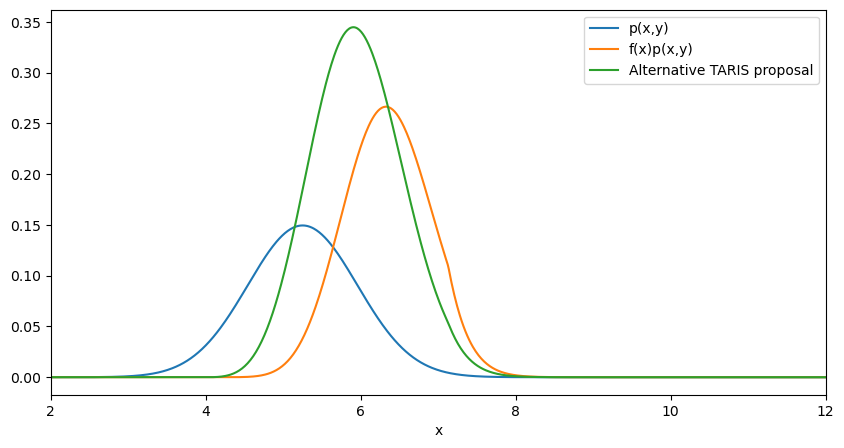

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def joint_density(x):
    return sp.stats.norm.pdf(x, loc=5, scale=1) * sp.stats.norm.pdf(5.5, loc=x, scale=1)
def target_joint_density(x):
    return np.minimum(15000, np.maximum(0, 50*(x-4)**5)) * joint_density(x)
def alternative_proposal(x):
    return np.sqrt(target_joint_density(x)*joint_density(x))

#plot optimal proposal
x = np.linspace(0, 12, 1000)
plt.figure(figsize=(10, 5))
plt.plot(x,joint_density(x), label='p(x,y)')
plt.plot(x,target_joint_density(x)/600, label='f(x)p(x,y)')
plt.plot(x,alternative_proposal(x)/10, label='Alternative TARIS proposal')
plt.xlabel('x')
plt.xlim(2, 12)
plt.legend()

### Plot 6

In [ ]:
# For this plot we need to train amortized TABI and sample from it
#then we downlad samples

import hdf5storage

### insert path to samples from q1 and q2 after training and sampling AMCI ##
data_1 = hdf5storage.loadmat('')   # insert path to samples from q1
data_2 = hdf5storage.loadmat('')   # insert path to samples from q2

#and start plot
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 

y_1 = data_1['y'][20][0]
y_1

def target_joint_density(x):
    return np.minimum(15000, np.maximum(0, 50*(x-4)**5)) * joint_x(x)

def joint_x(x):
    return sp.stats.norm.pdf(x, loc=5, scale=1) * sp.stats.norm.pdf(y_1, loc=x, scale=1)  

def alternative_optimal_proposal(x):
    return np.square(target_joint_density(x)*joint_x(x))

x = np.linspace(0, 10, 1000)
plt.plot(x, 5*joint_x(x))
plt.plot(x, target_joint_density(x)/100)
plt.hist(data_1['x_samples_q1'][20], bins=100, density=True)
plt.legend(['p(x,y)', 'f(x)p(x,y)', 'samples'])

### Plot 7 without TABI

In [ ]:
import matplotlib.pyplot as plt
import hdf5storage
import importlib
import estimators
import yaml
import os 
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'
importlib.reload(estimators)
from estimators import compute_ground_truth_TARIS, compute_TARIS_for_n, compute_ground_truth_TABI, compute_TABI_for_n

from msc_thesis.amortized_toy_example.path_utils import repo_base_path

#import and calculate average ReMSEs TARIS
with open('config_1d_non_iterative.yaml') as f:
    config = yaml.safe_load(f)
dir = os.path.join(repo_base_path, os.path.dirname(config['config']["checkpoint_q_ratio"]))
path = os.path.join(dir, 'samples.mat')
data = hdf5storage.loadmat(path)

n_values = [100, 250, 400, 550, 700, 850, 1000, 2500, 4000, 5500, 7000, 8500, 10000, 
            25000, 40000, 55000, 70000, 85000, 100000, 250000, 400000, 550000, 700000, 850000, 1000000]
ground_truth_array = compute_ground_truth_TARIS(data)

results_TARIS = {}
for n in n_values:
    print(f"Computing for n = {n}")
    results_TARIS[n] = compute_TARIS_for_n(data, n, ground_truth_array)
    
average_ReMSE_TARIS = []

for n in n_values:
    average_ReMSE_TARIS.append(np.mean(results_TARIS[n][0]))
    


plt.loglog(n_values, average_ReMSE_TARIS, 'o-', base=10)
plt.xlabel('Sample Size', fontsize=14)
plt.ylabel('ReMSE', fontsize=14)
plt.title('ReMSE of TARIS', fontsize=14)
plt.grid(True, which="both", ls="--", c='0.65')
plt.legend(['TARIS'])

### Plot 7

In [ ]:
import matplotlib.pyplot as plt
import hdf5storage
import importlib
import estimators
import yaml
import os 
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'
importlib.reload(estimators)
from estimators import compute_ground_truth_TARIS, compute_TARIS_for_n, compute_ground_truth_TABI, compute_TABI_for_n

from msc_thesis.amortized_toy_example.path_utils import repo_base_path

#import and calculate average ReMSEs TARIS
with open('config_1d_non_iterative.yaml') as f:
    config = yaml.safe_load(f)
dir = os.path.join(repo_base_path, os.path.dirname(config['config']["checkpoint_q_ratio"]))
path = os.path.join(dir, 'samples.mat')
data = hdf5storage.loadmat(path)

n_values = [100, 250, 400, 550, 700, 850, 1000, 2500, 4000, 5500, 7000, 8500, 10000, 
            25000, 40000, 55000, 70000, 85000, 100000, 250000, 400000, 550000, 700000, 850000, 1000000]
ground_truth_array = compute_ground_truth_TARIS(data)

results_TARIS = {}
for n in n_values:
    print(f"Computing for n = {n}")
    results_TARIS[n] = compute_TARIS_for_n(data, n, ground_truth_array)
    
average_ReMSE_TARIS = []

for n in n_values:
    average_ReMSE_TARIS.append(np.mean(results_TARIS[n][0]))
    
#import and calculate average ReMSEs TABI
#fill in file paths to samples from q1 and q2
data_1 = hdf5storage.loadmat('')  #insert path to samples from q1
data_2 = hdf5storage.loadmat('')  #insert path to samples from q2

ground_truth_array = compute_ground_truth_TABI(data_1)

results_TABI = {}
for n in n_values:
    print(f"Computing for n = {n}")
    results_TABI[n] = compute_TABI_for_n(data_1, data_2, n, ground_truth_array)

average_ReMSE_TABI = [np.mean(results_TABI[n][0]) for n in n_values]


plt.loglog(n_values, average_ReMSE_TABI, 'o-', base=10)
plt.loglog(n_values, average_ReMSE_TARIS, 'o-', base=10)
plt.xlabel('Sample Size', fontsize=14)
plt.ylabel('ReMSE', fontsize=14)
plt.title('ReMSE Comparison of TABI and TARIS', fontsize=14)
plt.grid(True, which="both", ls="--", c='0.65')
plt.legend(['TABI', 'TARIS'])